# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de courbure à partir de la métrique

## Limite non relativiste

On introduit une fonction $\Phi(x,y,z)$ qui représente le potentiel gravitationnel, et un paramètre $e$ qui sert de paramètre de développement et qui nous permet de conserver uniquement les termes linéaires en $\Phi$ quand c'est nécessaire.

In [1]:
from sympy import *
from sympy import Array

init_printing()

t, x, y, z, e = symbols('t, x, y, z, e')
Φ = Function('Φ')
gd = Array([[1+2*e*Φ(x,y,z), 0, 0, 0],[0, -1, 0, 0], [0, 0, -1, 0],[0, 0, 0, -1]])
coords = Array([t, x, y, z])
gu = Array([[1-2*e*Φ(x, y, z), 0, 0, 0],[0, -1, 0, 0], [0, 0, -1, 0],[0, 0, 0, -1]])
gd

⎡2⋅e⋅Φ(x, y, z) + 1  0   0   0 ⎤
⎢                              ⎥
⎢        0           -1  0   0 ⎥
⎢                              ⎥
⎢        0           0   -1  0 ⎥
⎢                              ⎥
⎣        0           0   0   -1⎦

In [2]:
gu

⎡-2⋅e⋅Φ(x, y, z) + 1  0   0   0 ⎤
⎢                               ⎥
⎢         0           -1  0   0 ⎥
⎢                               ⎥
⎢         0           0   -1  0 ⎥
⎢                               ⎥
⎣         0           0   0   -1⎦

In [2]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡⎡                    ∂                 ∂                 ∂             ⎤     
⎢⎢       0          e⋅──(Φ(x, y, z))  e⋅──(Φ(x, y, z))  e⋅──(Φ(x, y, z))⎥     
⎢⎢                    ∂x                ∂y                ∂z            ⎥     
⎢⎢                                                                      ⎥  ⎡  
⎢⎢  ∂                                                                   ⎥  ⎢-e
⎢⎢e⋅──(Φ(x, y, z))         0                 0                 0        ⎥  ⎢  
⎢⎢  ∂x                                                                  ⎥  ⎢  
⎢⎢                                                                      ⎥  ⎢  
⎢⎢  ∂                                                                   ⎥  ⎢  
⎢⎢e⋅──(Φ(x, y, z))         0                 0                 0        ⎥  ⎢  
⎢⎢  ∂y                                                                  ⎥  ⎢  
⎢⎢                                                                      ⎥  ⎣  
⎢⎢  ∂                                               

In [3]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡⎡                                                                ∂           
⎢⎢                  0                     e⋅(-2⋅e⋅Φ(x, y, z) + 1)⋅──(Φ(x, y, z
⎢⎢                                                                ∂x          
⎢⎢                                                                            
⎢⎢                        ∂                                                   
⎢⎢e⋅(-2⋅e⋅Φ(x, y, z) + 1)⋅──(Φ(x, y, z))                    0                 
⎢⎢                        ∂x                                                  
⎢⎢                                                                            
⎢⎢                        ∂                                                   
⎢⎢e⋅(-2⋅e⋅Φ(x, y, z) + 1)⋅──(Φ(x, y, z))                    0                 
⎢⎢                        ∂y                                                  
⎢⎢                                                                            
⎢⎢                        ∂                         

## Calcul du tenseur de courbure

In [4]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [5]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡  ⎛                                       2                                  
⎢  ⎜                       ⎛∂             ⎞                           ⎛∂      
⎢e⋅⎜e⋅(2⋅e⋅Φ(x, y, z) - 1)⋅⎜──(Φ(x, y, z))⎟  + e⋅(2⋅e⋅Φ(x, y, z) - 1)⋅⎜──(Φ(x,
⎢  ⎜                       ⎝∂x            ⎠                           ⎝∂y     
⎢  ⎝                                                                          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

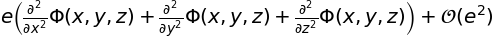

In [7]:
series(Ricci[0,0], e, n=2)

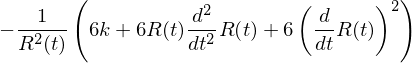

In [9]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

# Forces de marées (déviation géodésique)

L'équation de déviation géodésique est
$$
\nabla_\lambda^2 \xi^i + R^i{}_{kjl}\xi^j \dot x^k \dot x^l = 0
$$
Le problème est (i) d'obtenir la limite non relativiste de cette équation et (ii) de démontrer cette limite à partir de la physique newtonienne seulement.



## solution

### A)
Dans la limite non relativiste, on pose $\dot x^k = \delta_{k0}$ et le temps coordonnée peut être utilisé comme paramètre de la géodésique (en négligeant la connexion affine). L'équation de déviation géodésique devient
$$
\ddot\xi^i + R^i{}_{0j0}\xi^j = 0
$$
On doit donc calculer $R^i{}_{0j0}$ dans cette limite.
On trouve, après le calcul ci-dessous, que
$$ 
R^a{}_{0b0} \partial_a\partial_b\Phi \qquad (a,b = 1,2,3)
$$
Donc l'équation de déviation géodésique devient, dans cette limite non relativiste,
$$
\ddot\xi^a + R^a{}_{0b0}\xi^b = 0 \longrightarrow \ddot\xi^a = -\partial_a\partial_b\Phi\xi^b
$$
Comme l'accélération gravitationnelle est $g_a = -\partial_a\Phi$, on obtient 
$$
\ddot\xi^a = \partial_b g_a\xi^b
$$

### B)
Ce résultat peut se comprendre facilement dans la physique newtonienne.
Dans ce contexte, les dérivées ($\dot~$) sont par rapport au temps, qui est effectivement le paramètre des géodésiques.
Si $x^a(t)$ est la première géodésique et $y^a(t)= x^a(t) + \xi^a(t)$ est la géodésique voisine, alors
$\ddot x^a = g_a(x(t))$ et $\ddot y^a = g_a(x(t)+\xi(t))$.
Donc
$$
\ddot \xi^a(t) = \ddot y^a- \ddot x^a = g_a(x(t)+\xi(t)) - g_a(x(t)) = \partial_b g_a \xi^b
$$

In [28]:
R00 = R[:,0,:,0]

In [29]:
for a in range(1,4):
    for b in range(1,4):
        print('R00[{:d},{:d}] = '.format(a,b), series(R00[a,b], e, n=2))

R00[1,1] =  e*Derivative(Φ(x, y, z), (x, 2)) + O(e**2)
R00[1,2] =  e*Derivative(Φ(x, y, z), x, y) + O(e**2)
R00[1,3] =  e*Derivative(Φ(x, y, z), x, z) + O(e**2)
R00[2,1] =  e*Derivative(Φ(x, y, z), x, y) + O(e**2)
R00[2,2] =  e*Derivative(Φ(x, y, z), (y, 2)) + O(e**2)
R00[2,3] =  e*Derivative(Φ(x, y, z), y, z) + O(e**2)
R00[3,1] =  e*Derivative(Φ(x, y, z), x, z) + O(e**2)
R00[3,2] =  e*Derivative(Φ(x, y, z), y, z) + O(e**2)
R00[3,3] =  e*Derivative(Φ(x, y, z), (z, 2)) + O(e**2)
